In [1]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools as it
from cvxopt.solvers import qp 
from cvxopt import matrix
import time
import sheet3 as imp3
import sheet4 as imp
import copy
from sklearn.svm import LinearSVC,SVC
%matplotlib inline

In [2]:
def zero_one_loss(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    pred = np.array(y_pred)
    true = np.array(y_true)
    true[np.where(true==-1)]=0
    b = np.mean(pred)
    pred[np.where(pred>=b)] = 1
    pred[np.where(pred<b)] = 0
    right = (true == pred).astype(np.int64).sum()
    loss = (len(true)-right)/len(true)
    return loss

## Assignment 4

Use your SVM SMO implementation to train classifiers on the easy_2d dataset from the ISIS site

In [9]:
data=np.load('easy_2d.npz')
Y_te= data['Y_te']
X_te= data['X_te']
X_tr= data['X_tr']
Y_tr= data['Y_tr']

(1) Find the optimal parameters C and σ for a Gaussian kernel and plot the results. Use your cross validation method. If you do not have a running cross validation method, contact us.

In [10]:
np.linspace(0.1,2.0,10)

array([ 0.1       ,  0.31111111,  0.52222222,  0.73333333,  0.94444444,
        1.15555556,  1.36666667,  1.57777778,  1.78888889,  2.        ])

In [11]:
para = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-2,2,10), 'regularization': np.linspace(1.0,3.0,10)}

In [12]:
C=imp3.cv(X_tr.T,Y_tr,imp.svm_smo,para,loss_function=zero_one_loss)

Start iterarion:   1.9073486328125e-06


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


End  1 te iteration.  1 te fold.
Time:  88.97276520729065
Remain time:  4445.566093921661
End  1 te iteration.  2 te fold.
Time:  189.62835955619812
Remain time:  4529.447929859161
End  1 te iteration.  3 te fold.
Time:  280.6098167896271
Remain time:  3639.2644786834717
End  1 te iteration.  4 te fold.
Time:  367.7286515235901
Remain time:  3049.133414030075
End  1 te iteration.  5 te fold.
Time:  457.61345648765564
Remain time:  2696.521954536438
End  1 te iteration.  6 te fold.
Time:  548.2381625175476
Remain time:  2265.5996084213257
End  1 te iteration.  7 te fold.
Time:  637.3561646938324
Remain time:  1782.3462057113647
End  1 te iteration.  8 te fold.
Time:  725.7608704566956
Remain time:  1326.058759689331
End  1 te iteration.  9 te fold.
Time:  813.5026772022247
Remain time:  877.4106764793396
End  1 te iteration.  10 te fold.
Time:  898.4750921726227
Remain time:  424.8583698272705
End  2 te iteration.  1 te fold.
Time:  989.0424196720123
Remain time:  3622.654790878296
End 

In [25]:
print("Kernelparameter: ",C.kp)
print("C: ",C.c)
print("Number of Support Vector: ",len(C.SV))

Kernelparameter:  0.599484250319
C:  2.77777777778
Number of Support Vector:  39


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


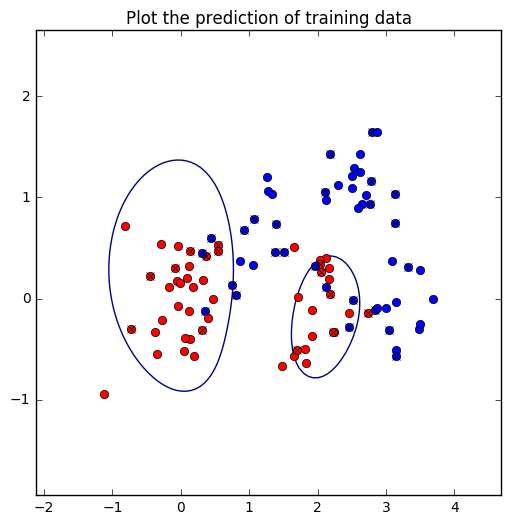

In [22]:
imp.plot_svm_2d(X_tr.T, Y_tr, C)
plt.title("Plot the prediction of training data")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


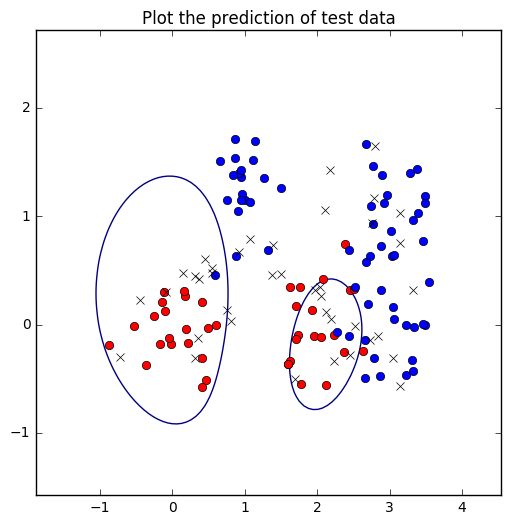

In [23]:
imp.plot_svm_2d(X_te.T, Y_te, C)
plt.title("Plot the prediction of test data")

In [15]:
np.logspace(-2,2,10)

array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])

(2). Train one model for a σ and C that obviously overfit and for a σ and C that obviously underfit the ddata. Plot the results.

In [71]:
Cu=imp.svm_smo('gaussian', 1.00000000e+02, 0.7)
Cu.fit(X_tr.T,Y_tr)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [72]:
print("Kernelparameter: ",Cu.kp)
print("C: ",Cu.c)
print("Number of Support Vector: ",len(Cu.SV))

Kernelparameter:  100.0
C:  0.7
Number of Support Vector:  88


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


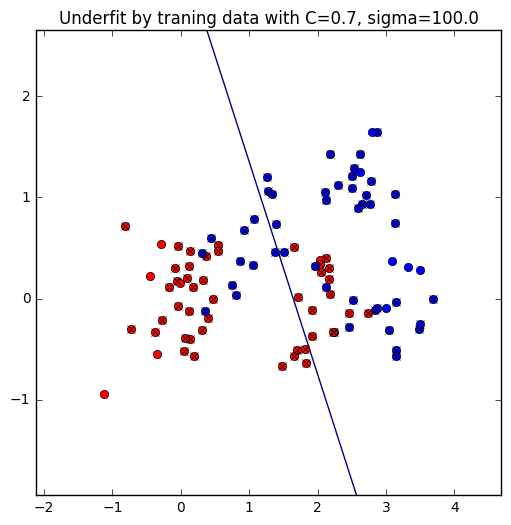

In [73]:
imp.plot_svm_2d(X_tr.T, Y_tr, Cu)
plt.title("Underfit by traning data with C=0.7, sigma=100.0")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


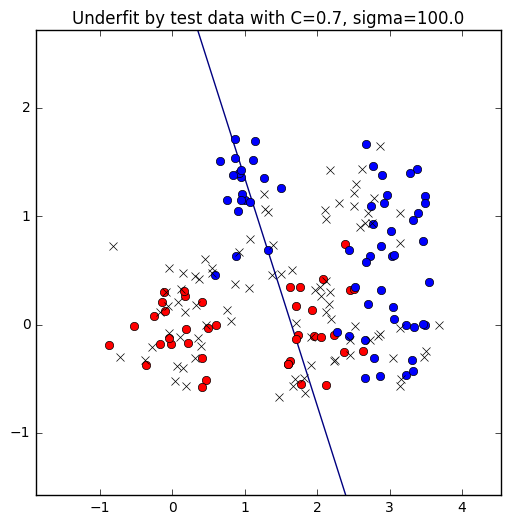

In [74]:
imp.plot_svm_2d(X_te.T, Y_te, Cu)
plt.title("Underfit by test data with C=0.7, sigma=100.0")

In [75]:
Co=imp.svm_smo('gaussian', 1.00000000e-01, 3.7)
Co.fit(X_tr.T,Y_tr)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [76]:
print("Kernelparameter: ",Co.kp)
print("C: ",Co.c)
print("Number of Support Vector: ",len(Co.SV))

Kernelparameter:  0.1
C:  3.7
Number of Support Vector:  67


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


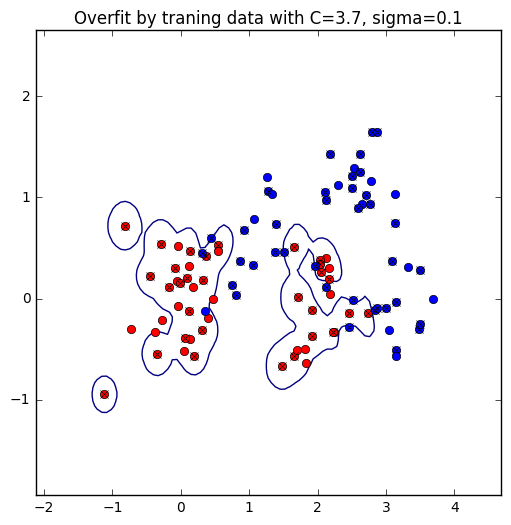

In [78]:
imp.plot_svm_2d(X_tr.T, Y_tr, Co)
plt.title("Overfit by traning data with C=3.7, sigma=0.1")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


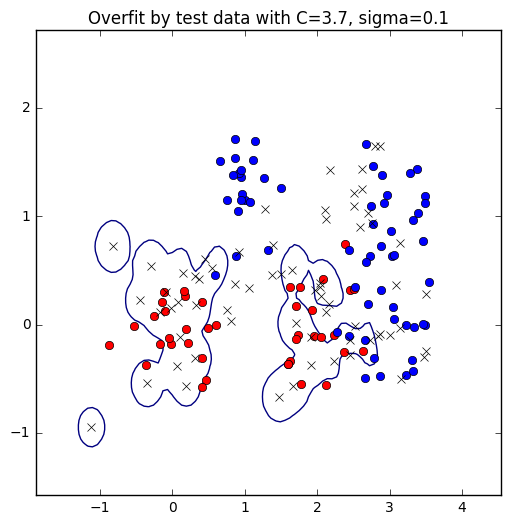

In [79]:
imp.plot_svm_2d(X_te.T, Y_te, Co)
plt.title("Overfit by test data with C=3.7, sigma=0.1")

(3). For optimal C and σ, plot a receiver operator characteristics (ROC) curve by varying the bias parameter b of your SVM model.

In [80]:
def bisachg(model,nb):
    new=copy.deepcopy(model)
    new.b = nb
    return new

def roc_fun(model,X, y_true):
    bins=100
    n=len(y_true)
    bias = np.linspace(-10,10,110)
    modset = [bisachg(model,b) for b in bias]
    pred_y = np.array([modset[i].predict(X) for i in range(len(modset))])
    npred_y = ((pred_y+1)/2)
    ny_true = ((y_true+1)/2).shape(1,len(y_true))
    tpr = (ny_true*npred_y).sum(1)/npred_y.sum()
    fpr = 
    
    fpr = .sum(1)/(n-true.sum())
    idx=np.argsort(fpr)
    roc = np.append(fpr.reshape(1,len(fpr)),tpr.reshape(1,len(tpr)),0)
    ROC = roc[:,idx]
    

    fpdif = ROC[0,1:]-ROC[0,:-1]
    lower = fpdif*ROC[1,:-1]
    upper = fpdif*ROC[1,1:]
    AUC = (lower.sum()+upper.sum())/2
    print("AUC = ",AUC)
    plt.plot(ROC[0],ROC[1])
    plt.title("ROC curve")
    plt.xlabel("FP")
    plt.ylabel("TP")




In [97]:
import copy
np.linspace(-10,10,100).shape

(100,)

In [109]:
def bisachg(model,nb):
    new=copy.deepcopy(model)
    new.b = nb
    return new


In [104]:
CC = copy.deepcopy(C)

In [118]:
X=X_te.T
model = CC
bias = np.linspace(-10,10,110)
modset = [bisachg(model,b) for b in bias]
pred_y = np.array([modset[i].predict(X) for i in range(len(modset))])

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [120]:
((pred_y+1)/2)[50]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:28: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


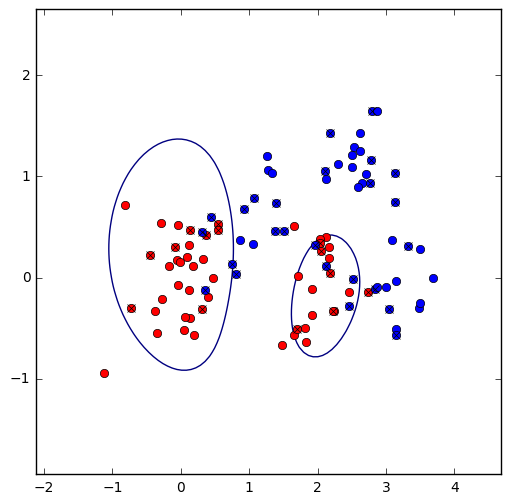

In [108]:
imp.plot_svm_2d(X_tr.T, Y_tr, CC)

## Assignment 6

In this assignment you will work on the UCI Iris dataset1. This is a 4-dimensional dataset with 150 instances in 3 classes. Use the .npy file from the ISIS site. Which classes are linearly separable from the two other classes and which classes are not? Are they separable with a non-linear classifier? Describe what you tested. Provide the found hyperparameters and classification accuracies.

In [25]:
class PCA():
    def __init__(self, X):
        # ...
        Xt = X.T
        C = np.cov(Xt)
        D, U = np.linalg.eigh(C)
        idx = np.argsort(-D)
        self.U = U.T[idx]
        self.D = D[idx]
        
    
    def project(self, X, m):
        # ...
        U = self.U.T
        M = U[:,:m] 
        Z = np.dot(M.T,X.T)
        Z = Z.T 
        return Z
    
    def denoise(self, X, m):
        Z = self.project(X,m)
        U = self.U.T
        Y = np.dot(U[:,:m],Z.T)
        Y = Y + np.mean(X,axis=1).reshape(len(Y),1)
        return Y.T

In [56]:
def plot_svm_2d_kai(X, y,Y, model):
    n=len(X)
    plt.figure(figsize = (6, 6))
    plt.plot(X[Y ==  1,0], X[Y ==  1,1], 'ro',label='class 1')
    plt.plot(X[Y == 2,0], X[Y == 2,1], 'bo',label='class 2')
    plt.plot(X[Y == 3,0], X[Y == 3,1], 'wo',label='class 3')
    plt.legend(loc="upper right")
    plt.plot(model.SV[:,0],model.SV[:,1],'kx')
    a = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, n)
    b = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, n)
    A, B = np.meshgrid(a,b)
    mesh_z = np.zeros((n, n))
    for y in range(n):
        for x in range(n):
            mesh_z[y, x] = model.fx(np.array([a[x], b[y]]).reshape(1,2),model.SV,model.y)
    plt.contour(A, B, mesh_z, 0)

In [49]:
iris=np.load('iris.npz')
X = iris['X'].T
Y = iris['Y']

In [50]:
pca= PCA(X)
X_pro = pca.project(X,2)

In [51]:
Y1_23 = np.array(Y)
Y1_23[np.where(Y1_23==2)]=-1
Y1_23[np.where(Y1_23==3)]=-1
Y2_13 = np.array(Y)
Y2_13[np.where(Y2_13==1)]=-1
Y2_13[np.where(Y2_13==2)]=1
Y2_13[np.where(Y2_13==3)]=-1
Y3_12 = np.array(Y)
Y3_12[np.where(Y3_12==1)]=-1
Y3_12[np.where(Y3_12==2)]=-1
Y3_12[np.where(Y3_12==3)]=1

In [52]:
#Kernelparameter:  0.599484250319
#C:  2.77777777778
svm1_23=imp.svm_qp(kernel='linear',kernelparameter=1.,C=1.)
svm1_23.fit(X_pro,Y1_23)
svm2_13=imp.svm_qp(kernel='linear',kernelparameter=1.,C=1.)
svm2_13.fit(X_pro,Y2_13)
svm3_12=imp.svm_qp(kernel='linear',kernelparameter=1.,C=1.)
svm3_12.fit(X_pro,Y3_13)

     pcost       dcost       gap    pres   dres
 0: -1.0855e+01 -2.5483e+02  1e+03  3e+00  2e-13
 1: -5.2825e+00 -1.3158e+02  2e+02  3e-01  2e-13
 2: -3.3778e-01 -2.4035e+01  4e+01  4e-02  1e-13
 3: -1.1436e-01 -2.4293e+00  3e+00  2e-03  3e-14
 4: -4.5700e-01 -8.7125e-01  5e-01  3e-04  1e-14
 5: -5.3018e-01 -9.0786e-01  4e-01  2e-04  2e-14
 6: -6.8732e-01 -7.3333e-01  5e-02  5e-06  2e-14
 7: -7.0461e-01 -7.0532e-01  7e-04  7e-08  2e-14
 8: -7.0490e-01 -7.0490e-01  7e-06  7e-10  2e-14
 9: -7.0490e-01 -7.0490e-01  7e-08  7e-12  2e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0098e+02 -3.2405e+02  1e+03  2e+00  6e-13
 1: -7.2232e+01 -2.1970e+02  2e+02  1e-01  8e-13
 2: -7.8268e+01 -1.0373e+02  3e+01  2e-02  6e-13
 3: -8.6276e+01 -9.1262e+01  5e+00  3e-03  7e-13
 4: -8.8193e+01 -8.9001e+01  8e-01  2e-16  8e-13


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


 5: -8.8458e+01 -8.8645e+01  2e-01  5e-15  9e-13
 6: -8.8530e+01 -8.8554e+01  2e-02  4e-16  7e-13
 7: -8.8541e+01 -8.8541e+01  4e-04  4e-15  7e-13
 8: -8.8541e+01 -8.8541e+01  4e-06  8e-15  8e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.5913e+01 -2.5668e+02  1e+03  2e+00  5e-13
 1: -4.1183e+01 -1.5021e+02  2e+02  2e-01  5e-13
 2: -2.6258e+01 -7.7057e+01  1e+02  1e-01  4e-13
 3: -1.6783e+01 -3.2684e+01  3e+01  3e-02  2e-13
 4: -1.6319e+01 -2.0037e+01  6e+00  4e-03  2e-13
 5: -1.6824e+01 -1.7870e+01  1e+00  1e-03  2e-13
 6: -1.6967e+01 -1.7424e+01  6e-01  3e-04  2e-13
 7: -1.7075e+01 -1.7178e+01  1e-01  6e-05  2e-13
 8: -1.7111e+01 -1.7114e+01  4e-03  1e-06  2e-13
 9: -1.7113e+01 -1.7113e+01  2e-04  4e-08  2e-13
10: -1.7113e+01 -1.7113e+01  7e-06  5e-10  2e-13
Optimal solution found.


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


Loss:  0.0


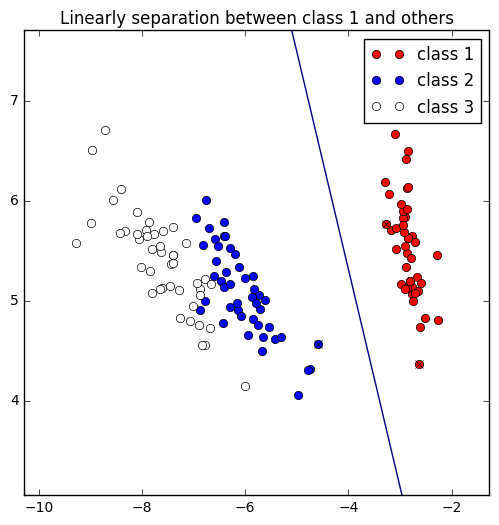

In [70]:
print("Loss: ",float(np.sum(np.sign(Y1_23) != np.sign(svm1_23.predict(X_pro))))/float(len(Y)))
plot_svm_2d_kai(X_pro, Y1_23,Y, svm1_23)
plt.title("Linearly separation between class 1 and others")


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


Loss:  0.2814814814814815


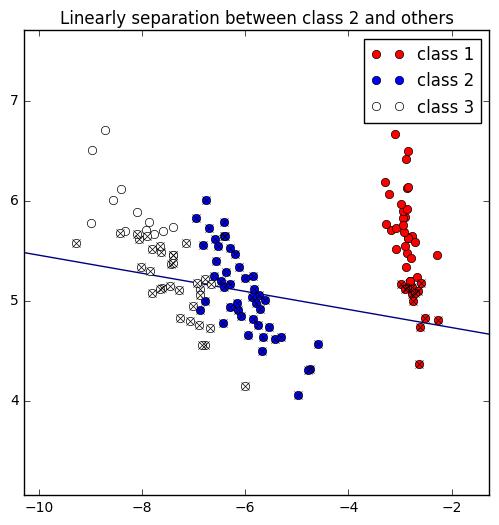

In [71]:
print("Loss: ",float(np.sum(np.sign(Y2_13) != np.sign(svm2_13.predict(X_pro))))/float(len(Y)))
plot_svm_2d_kai(X_pro, Y2_13,Y, svm2_13)
plt.title("Linearly separation between class 2 and others")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


Loss:  0.037037037037037035


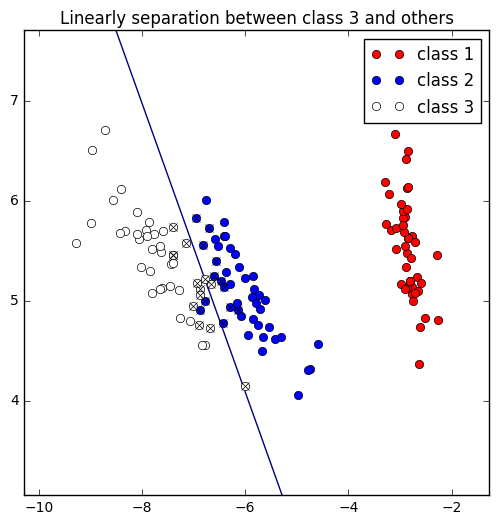

In [72]:
print("Loss: ",float(np.sum(np.sign(Y3_12) != np.sign(svm3_12.predict(X_pro))))/float(len(Y)))
plot_svm_2d_kai(X_pro, Y3_12,Y, svm3_12)
plt.title("Linearly separation between class 3 and others")

### Non linear

In [62]:
#Kernelparameter:  0.599484250319
#C:  2.77777777778
svmnl1_23=imp.svm_qp(kernel='gaussian',kernelparameter=1.,C=1.)
svmnl1_23.fit(X_pro,Y1_23)
svmnl2_13=imp.svm_qp(kernel='gaussian',kernelparameter=1.,C=1.)
svmnl2_13.fit(X_pro,Y2_13)
svmnl3_12=imp.svm_qp(kernel='gaussian',kernelparameter=1.,C=1.)
svmnl3_12.fit(X_pro,Y3_13)

     pcost       dcost       gap    pres   dres
 0: -1.2280e+00 -1.5060e+02  6e+02  1e+00  6e-16
 1:  9.2789e-01 -5.0154e+01  5e+01  2e-15  6e-16
 2: -1.9186e+00 -6.4568e+00  5e+00  5e-16  7e-16
 3: -2.4248e+00 -3.4940e+00  1e+00  1e-15  3e-16
 4: -2.5660e+00 -2.9706e+00  4e-01  8e-16  2e-16
 5: -2.6462e+00 -2.8599e+00  2e-01  1e-15  3e-16
 6: -2.6857e+00 -2.7479e+00  6e-02  2e-16  3e-16
 7: -2.7037e+00 -2.7099e+00  6e-03  7e-16  3e-16
 8: -2.7063e+00 -2.7064e+00  2e-04  8e-16  3e-16
 9: -2.7063e+00 -2.7063e+00  2e-06  2e-15  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7532e+01 -2.1871e+02  9e+02  2e+00  1e-15
 1: -1.0784e+01 -1.0583e+02  1e+02  2e-02  2e-15
 2: -1.5386e+01 -3.2784e+01  2e+01  3e-03  1e-15
 3: -1.7565e+01 -2.3800e+01  6e+00  8e-04  1e-15
 4: -1.8751e+01 -2.0308e+01  2e+00  1e-04  1e-15
 5: -1.9126e+01 -1.9451e+01  3e-01  1e-05  2e-15
 6: -1.9184e+01 -1.9357e+01  2e-01  1e-06  2e-15
 7: -1.9243e+01 -1.9257e+01  1e-02  8e-08  2e-1

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


 9: -1.9249e+01 -1.9249e+01  2e-06  1e-11  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7679e+01 -2.1701e+02  9e+02  2e+00  1e-15
 1: -1.0804e+01 -1.0367e+02  9e+01  6e-15  2e-15
 2: -1.5663e+01 -3.2238e+01  2e+01  1e-15  1e-15
 3: -1.8025e+01 -2.3031e+01  5e+00  5e-15  1e-15
 4: -1.9038e+01 -2.0306e+01  1e+00  2e-15  1e-15
 5: -1.9376e+01 -1.9634e+01  3e-01  1e-15  1e-15
 6: -1.9447e+01 -1.9511e+01  6e-02  1e-15  2e-15
 7: -1.9471e+01 -1.9475e+01  4e-03  4e-15  2e-15
 8: -1.9473e+01 -1.9473e+01  2e-04  1e-15  2e-15
 9: -1.9473e+01 -1.9473e+01  3e-06  2e-15  2e-15
Optimal solution found.


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


Loss:  0.0


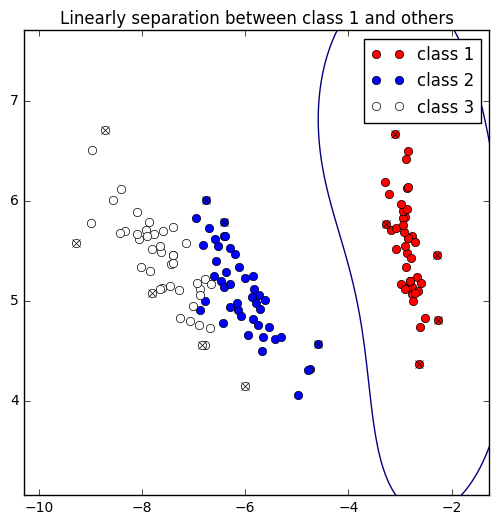

In [73]:
print("Loss: ",float(np.sum(np.sign(Y1_23) != np.sign(svmnl1_23.predict(X_pro))))/float(len(Y)))
plot_svm_2d_kai(X_pro, Y1_23,Y, svmnl1_23)
plt.title("Linearly separation between class 1 and others")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


Loss:  0.037037037037037035


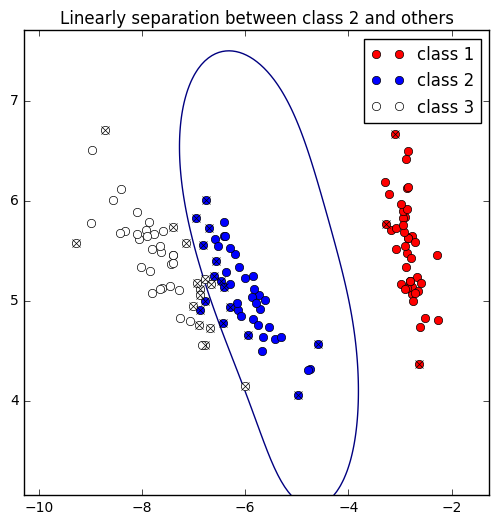

In [74]:
print("Loss: ",float(np.sum(np.sign(Y2_13) != np.sign(svmnl2_13.predict(X_pro))))/float(len(Y)))
plot_svm_2d_kai(X_pro, Y2_13,Y, svmnl2_13)
plt.title("Linearly separation between class 2 and others")

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/git/04/sheet4.py:174: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


Loss:  0.037037037037037035


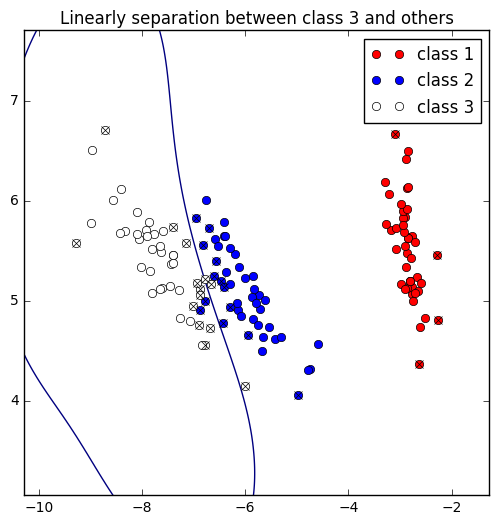

In [75]:
print("Loss: ",float(np.sum(np.sign(Y3_12) != np.sign(svmnl3_12.predict(X_pro))))/float(len(Y)))
plot_svm_2d_kai(X_pro, Y3_12,Y, svmnl3_12)
plt.title("Linearly separation between class 3 and others")

## Assignment 7

We would now like to use the SVM on a ’real’ dataset, the USPS dataset, which we saw on earlier sheets. In this case, one trains to classify one digit against the rest of the digits (one-vs-rest classification).

(1). Use 5-fold Cross Validation (see exercise sheet 4), to find the best kernel and kernel parameters for each digit. Report the best kernel and kernel parameter as well as the estimated test error for each digit.

In [41]:
def linsvm(knl,kp,c):
    method =LinearSVC(C=c)
    return method

In [42]:
def zero_one_loss(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    pred = np.array(y_pred)
    true = np.array(y_true)
    true[np.where(true==-1)]=0
    b = np.mean(pred)
    pred[np.where(pred>=b)] = 1
    pred[np.where(pred<b)] = 0
    right = (true == pred).astype(np.int64).sum()
    loss = (len(true)-right)/len(true)
    return loss

In [5]:
from scipy.io import loadmat
usps = loadmat('usps.mat')
lbl=usps['data_labels'].T
datpat=usps['data_patterns'].T

In [6]:
datpat.shape

(2007, 256)

In [7]:
#def cv(X, y, method, parameters,nfolds=10, nrepetitions=5,loss_function=zero_one_loss):
para_l = { 'kernel': ['linear'], 'kernelparameter': np.array([0]), 'regularization': np.linspace(0.1,3.0,10)}
para_p = { 'kernel': 'poly', 'kernelparameter': np.logspace(1,5,5), 'regularization': np.linspace(1.0,3.0,5)}
para_g = { 'kernel': 'rbf', 'kernelparameter':  np.linspace(1/1.0,1/5.0,10), 'regularization': np.linspace(0.1,3.0,5)}

In [43]:
C_l=[imp3.cv(datpat, lbl[:,i],linsvm, para_l,nfolds=5, nrepetitions=3,loss_function=zero_one_loss) for i in range(10)]


Start iterarion:   1.1920928955078125e-06
End  1 te iteration.  1 te fold.
Time:  3.7324154376983643
Remain time:  55.966880321502686
End  1 te iteration.  2 te fold.
Time:  7.451120376586914
Remain time:  44.62266254425049
End  1 te iteration.  3 te fold.
Time:  11.099329471588135
Remain time:  32.83515214920044
End  1 te iteration.  4 te fold.
Time:  14.811320543289185
Remain time:  22.27259874343872
End  1 te iteration.  5 te fold.
Time:  18.60270929336548
Remain time:  11.370996236801147
End  2 te iteration.  1 te fold.
Time:  22.31489586830139
Remain time:  37.11766719818115
End  2 te iteration.  2 te fold.
Time:  26.006898641586304
Remain time:  29.53499984741211
End  2 te iteration.  3 te fold.
Time:  29.719027996063232
Remain time:  22.273620128631592
End  2 te iteration.  4 te fold.
Time:  33.44640016555786
Remain time:  14.909326553344727
End  2 te iteration.  5 te fold.
Time:  37.35023283958435
Remain time:  7.805904388427734
End  3 te iteration.  1 te fold.
Time:  40.994210

In [25]:
for i in range(10):
    print("Best C for the digit ",i," by the Linear Kernel C=",C_l[i].C)
    print("The Error rate: ", 1-((C_l[i].predict(datpat)==lbl[:,i]).sum())/len(lbl[:,i]))


Best C for the digit  0  by the Linear Kernel C= 0.422222222222
The Error rate:  0.00498256103637
Best C for the digit  1  by the Linear Kernel C= 0.1
The Error rate:  0.00348779272546
Best C for the digit  2  by the Linear Kernel C= 0.1
The Error rate:  0.0189337319382
Best C for the digit  3  by the Linear Kernel C= 0.422222222222
The Error rate:  0.00896860986547
Best C for the digit  4  by the Linear Kernel C= 0.422222222222
The Error rate:  0.00996512207275
Best C for the digit  5  by the Linear Kernel C= 0.744444444444
The Error rate:  0.00697558545092
Best C for the digit  6  by the Linear Kernel C= 1.71111111111
The Error rate:  0.0
Best C for the digit  7  by the Linear Kernel C= 3.0
The Error rate:  0.000498256103637
Best C for the digit  8  by the Linear Kernel C= 2.67777777778
The Error rate:  0.0104633781764
Best C for the digit  9  by the Linear Kernel C= 0.422222222222
The Error rate:  0.01096163428


In [22]:
(np.array([1,-1,1,1])==np.array([1,1,1,1])).sum()

3

In [8]:
def polsvc(knl,kp,c):
    method =SVC(C=c, kernel=knl, degree=kp)
    return method

def gausvc(knl,kp,c):
    method =SVC(C=c, kernel=knl, gamma=kp)
    return method

In [9]:
C_p=[imp3.cv(datpat, lbl[:,i],polsvc , para_p,nfolds=5, nrepetitions=3,loss_function=zero_one_loss) for i in range(10)]


Start iterarion:   1.430511474609375e-06
End  1 te iteration.  1 te fold.
Time:  33.73629546165466
Remain time:  505.97522735595703
End  1 te iteration.  2 te fold.
Time:  66.84134936332703
Remain time:  397.2564525604248
End  1 te iteration.  3 te fold.
Time:  99.82861995697021
Remain time:  296.8808455467224
End  1 te iteration.  4 te fold.
Time:  132.7690770626068
Remain time:  197.64108610153198
End  1 te iteration.  5 te fold.
Time:  163.7328233718872
Remain time:  92.89534878730774
End  2 te iteration.  1 te fold.
Time:  195.16697239875793
Remain time:  314.32682514190674
End  2 te iteration.  2 te fold.
Time:  226.27483201026917
Remain time:  248.8564281463623
End  2 te iteration.  3 te fold.
Time:  259.78650069236755
Remain time:  201.07006216049194
End  2 te iteration.  4 te fold.
Time:  293.66197538375854
Remain time:  135.49948406219482
End  2 te iteration.  5 te fold.
Time:  326.2129065990448
Remain time:  65.10072660446167
End  3 te iteration.  1 te fold.
Time:  358.293019

In [14]:
for i in range(10):
    print("Best C for the digit ",i," by the Polynomal Kernel C=",C_p[i].C)
    print("And degree p= ",C_p[i].degree)
    print("The Error rate: ", 1-((C_p[i].predict(datpat)==lbl[:,i]).sum())/len(lbl[:,i]))

Best C for the digit  0  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.178873941206
Best C for the digit  1  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.00946686596911
Best C for the digit  2  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.0986547085202
Best C for the digit  3  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.0827105132038
Best C for the digit  4  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.0996512207275
Best C for the digit  5  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.079720976582
Best C for the digit  6  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.0847035376183
Best C for the digit  7  by the Polynomal Kernel C= 2.0
And degree p=  10.0
The Error rate:  0.0568011958146
Best C for the digit  8  by the Polynomal Kernel C= 1.0
And degree p=  10.0
The Error rate:  0.0827105132038
Best C for the digit

In [10]:
C_g=[imp3.cv(datpat, lbl[:,i],gausvc , para_g,nfolds=5, nrepetitions=3,loss_function=zero_one_loss) for i in range(10)]

Start iterarion:   1.9073486328125e-06
End  1 te iteration.  1 te fold.
Time:  159.69760179519653
Remain time:  2395.3614449501038
End  1 te iteration.  2 te fold.
Time:  317.40932607650757
Remain time:  1892.5395812988281
End  1 te iteration.  3 te fold.
Time:  481.17272758483887
Remain time:  1473.8689484596252
End  1 te iteration.  4 te fold.
Time:  646.1137320995331
Remain time:  989.6507849693298
End  1 te iteration.  5 te fold.
Time:  809.484650850296
Remain time:  490.11008405685425
End  2 te iteration.  1 te fold.
Time:  981.8472599983215
Remain time:  1723.6205863952637
End  2 te iteration.  2 te fold.
Time:  1160.0827612876892
Remain time:  1425.8837432861328
End  2 te iteration.  3 te fold.
Time:  1339.9669840335846
Remain time:  1079.3029518127441
End  2 te iteration.  4 te fold.
Time:  1522.2511415481567
Remain time:  729.1342458724976
End  2 te iteration.  5 te fold.
Time:  1699.3074669837952
Remain time:  354.11235523223877
End  3 te iteration.  1 te fold.
Time:  1873.10

In [16]:
for i in range(10):
    print("Best C for the digit ",i," by the Gaussian Kernel C=",C_g[i].C)
    print("And kernel width w= ",1/np.sqrt(2*C_g[i].gamma))
    print("The Error rate: ", 1-((C_g[i].predict(datpat)==lbl[:,i]).sum())/len(lbl[:,i]))

Best C for the digit  0  by the Gaussian Kernel C= 0.825
And kernel width w=  1.31558702896
The Error rate:  0.0
Best C for the digit  1  by the Gaussian Kernel C= 1.55
And kernel width w=  0.948683298051
The Error rate:  0.000498256103637
Best C for the digit  2  by the Gaussian Kernel C= 0.1
And kernel width w=  0.707106781187
The Error rate:  0.0986547085202
Best C for the digit  3  by the Gaussian Kernel C= 0.1
And kernel width w=  0.707106781187
The Error rate:  0.0827105132038
Best C for the digit  4  by the Gaussian Kernel C= 0.1
And kernel width w=  0.707106781187
The Error rate:  0.0996512207275
Best C for the digit  5  by the Gaussian Kernel C= 0.1
And kernel width w=  0.707106781187
The Error rate:  0.079720976582
Best C for the digit  6  by the Gaussian Kernel C= 0.825
And kernel width w=  1.58113883008
The Error rate:  0.0279023418037
Best C for the digit  7  by the Gaussian Kernel C= 0.825
And kernel width w=  1.58113883008
The Error rate:  0.0189337319382
Best C for the 

In [44]:
C_l_choice=C_l[1].support_vectors_[np.random.choice(len(C_l[1].support_vectors_),5,replace=False)]
rang = np.arange(256)+1
fig=plt.figure(figsize=(5,1))
subtitle = fig.suptitle("Random choice of SV of Linear for class 1")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(C_l_choice[i].reshape(16,16), cmap='gray')
    plt.xticks([])
    plt.yticks([])

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'

In [ ]:
C_l_choice=C_l[1].support_vectors_[np.random.choice(len(C_l[1].support_vectors_),5,replace=False)]
rang = np.arange(256)+1
fig=plt.figure(figsize=(5,1))
subtitle = fig.suptitle("Random choice of SV of Linear for class 1")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(C_l_choice[i].reshape(16,16), cmap='gray')
    plt.xticks([])
    plt.yticks([])

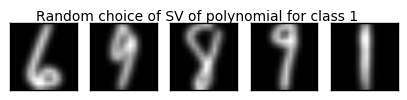

In [45]:
C_p_choice=C_p[1].support_vectors_[np.random.choice(len(C_p[1].support_vectors_),5,replace=False)]
rang = np.arange(256)+1
fig=plt.figure(figsize=(5,1))
subtitle = fig.suptitle("Random choice of SV of polynomial for class 1")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(C_p_choice[i].reshape(16,16), cmap='gray')
    plt.xticks([])
    plt.yticks([])

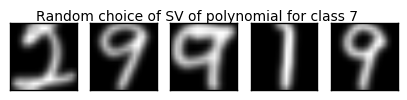

In [46]:
C_p_choice=C_p[7].support_vectors_[np.random.choice(len(C_p[7].support_vectors_),5,replace=False)]
rang = np.arange(256)+1
fig=plt.figure(figsize=(5,1))
subtitle = fig.suptitle("Random choice of SV of polynomial for class 7")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(C_p_choice[i].reshape(16,16), cmap='gray')
    plt.xticks([])
    plt.yticks([])

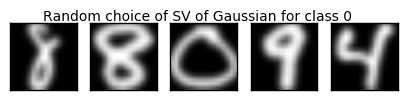

In [36]:
C_g_choice=C_g[0].support_vectors_[np.random.choice(len(C_g[0].support_vectors_),5,replace=False)]
rang = np.arange(256)+1
fig=plt.figure(figsize=(5,1))
subtitle = fig.suptitle("Random choice of SV of Gaussian for class 0")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(C_g_choice[i].reshape(16,16), cmap='gray')
    plt.xticks([])
    plt.yticks([])

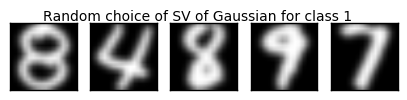

In [38]:
C_g_choice=C_g[1].support_vectors_[np.random.choice(len(C_g[1].support_vectors_),5,replace=False)]
rang = np.arange(256)+1
fig=plt.figure(figsize=(5,1))
subtitle = fig.suptitle("Random choice of SV of Gaussian for class 1")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(C_g_choice[i].reshape(16,16), cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [24]:
C_g[1].support_vectors_.shape

(1872, 256)

In [98]:
class cl():
    def __init__(self, a):
        self.b=a

In [99]:
cls = cl(1)

In [100]:
def bisachg(model,nb):
    new=copy.deepcopy(model)
    new.b = nb
    return new

In [101]:
clsset=[bisachg(cls,i) for i in range(10)]

In [102]:
for i in range(10):
    print(clsset[i].b)

0
1
2
3
4
5
6
7
8
9
